In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt

Importation du csv dans un dataframe

In [2]:
df_ = pd.read_csv('./rfm_filtered_2009-2010.csv', index_col='Customer ID')
df = df_.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TotalInvoices           4322 non-null   int64  
 1   TotalQuantity           4322 non-null   int64  
 2   TotalPrice              4322 non-null   float64
 3   Recency                 4322 non-null   int64  
 4   CancellationPercentage  4322 non-null   float64
 5   AvgItemsPerOrder        4322 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 236.4 KB


### Normalisation des données

In [4]:
from sklearn.preprocessing import StandardScaler

# Normaliser les valeurs RFM
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(df)

### Nombre de clusters : méthode du coude

In [5]:
# from kneed import KneeLocator

# inertias = []

# for n_clusters in range(1, 30):
#     kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
#     kmeans.fit(rfm_normalized)
#     inertias.append(kmeans.inertia_)

# knee = KneeLocator(range(1, 30), inertias, curve="convex", direction="decreasing")

# plt.plot(range(1, 30), inertias, marker='o')
# plt.title("Méthode du Coude")
# plt.xlabel("Nombre de Clusters")
# plt.ylabel("Inertie")
# plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label='Coude')
# plt.legend()
# plt.show()

# print("Nombre de clusters détecté:", knee.elbow)

### Application du clustering (avec K-means)

In [6]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

### Réduction de dimension avec T-SNE

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(rfm_normalized)

### Visualisation des clusters ave T-SNE

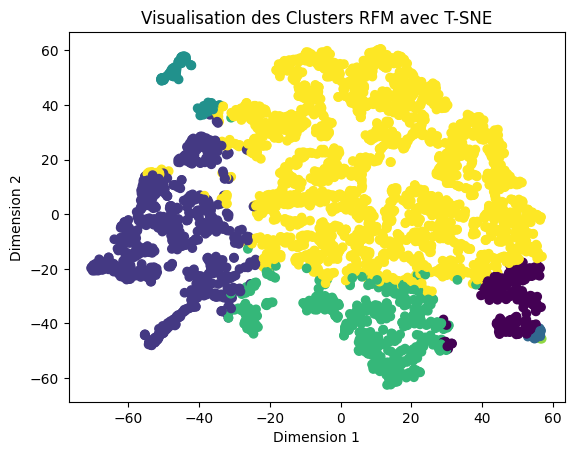

In [8]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap="viridis")
plt.title("Visualisation des Clusters RFM avec T-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


## PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(rfm_normalized)

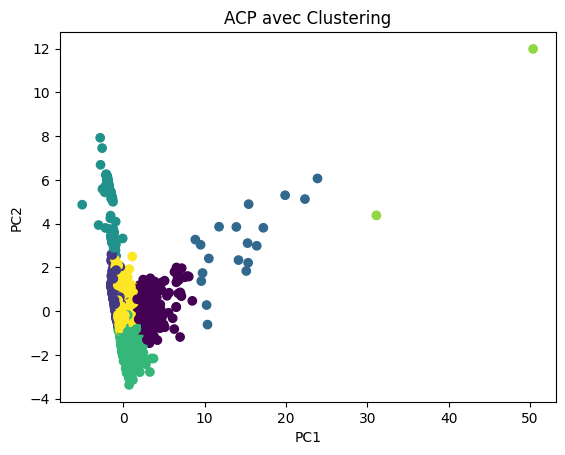

In [10]:
# Scatter plot des composantes principales avec une couleur pour chaque cluster
plt.scatter(pca_data[:,0],pca_data[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec Clustering')
plt.show()

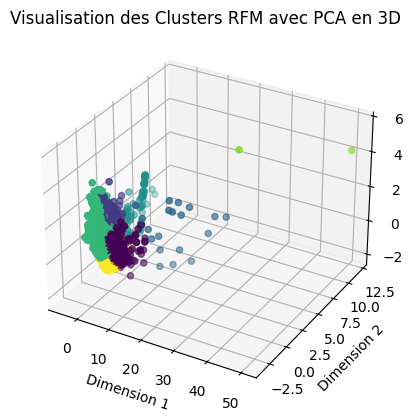

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters, cmap='viridis')
ax.set_title("Visualisation des Clusters RFM avec PCA en 3D")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()


In [12]:
import numpy as np

# Obtention du nombre de points par cluster
nombre_points_par_cluster = np.bincount(kmeans.labels_)

# Affichage des résultats
for cluster, nombre_points in enumerate(nombre_points_par_cluster):
    print(f"Cluster {cluster}: {nombre_points} points")


Cluster 0: 230 points
Cluster 1: 883 points
Cluster 2: 19 points
Cluster 3: 108 points
Cluster 4: 593 points
Cluster 5: 2 points
Cluster 6: 2487 points


In [16]:
# Filtrer les clients du cluster 4
cluster_2_clients = df[kmeans.labels_ == 2]
cluster_2_clients


,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
Customer ID,,,,,,
12471,86,9949,22735.800,3,12.163743,115.686047
12748,178,14113,22662.320,0,1.085434,79.286517
12931,53,25188,38013.860,5,24.175824,475.245283
13089,139,29658,58404.320,2,2.458513,213.366906
13093,78,23415,49328.370,7,5.117707,300.192308
13408,61,14142,24829.462,7,3.015075,231.836066
13777,43,13828,30389.840,0,9.633028,321.581395
13798,66,26064,40557.750,13,23.888889,394.909091
13881,29,19384,27402.980,23,2.787456,668.413793


In [14]:
# Filtrer les clients du cluster 3
cluster_5_clients = df[kmeans.labels_ == 5]
cluster_5_clients

,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
Customer ID,,,,,,
14911,278,67523,140056.31,0,2.814259,242.888489
15061,95,54135,90683.90,8,0.642055,569.842105


Les clients des clusters 5 sont trop peu nombreux, on supprime les 2 lignes 

In [17]:
df = df.drop(cluster_5_clients.index)

On relance le clustering avec 5 cluster

In [18]:
from sklearn.preprocessing import StandardScaler

# Normaliser les valeurs RFM
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(df)

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(rfm_normalized)


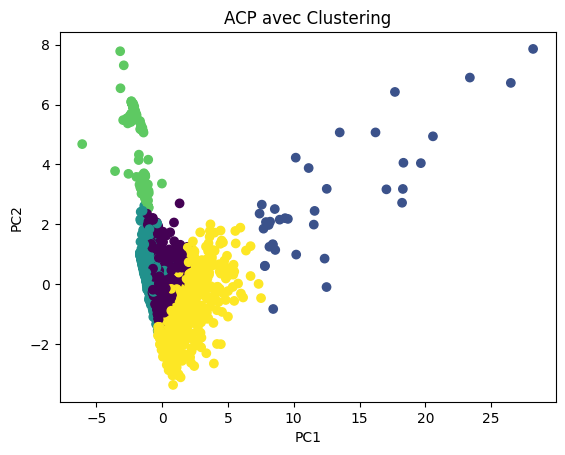

In [21]:
# Scatter plot des composantes principales avec une couleur pour chaque cluster
plt.scatter(pca_data[:,0],pca_data[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec Clustering')
plt.show()

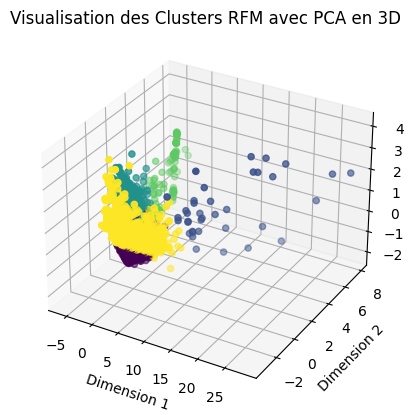

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters, cmap='viridis')
ax.set_title("Visualisation des Clusters RFM avec PCA en 3D")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()

In [23]:
# Obtention du nombre de points par cluster
nombre_points_par_cluster = np.bincount(kmeans.labels_)

# Affichage des résultats
for cluster, nombre_points in enumerate(nombre_points_par_cluster):
    print(f"Cluster {cluster}: {nombre_points} points")


Cluster 0: 2546 points
Cluster 1: 37 points
Cluster 2: 925 points
Cluster 3: 108 points
Cluster 4: 704 points


In [24]:
grouped_df = df.groupby(kmeans.labels_)
cluster_stats = grouped_df.agg(['count', 'mean', 'std', 'min', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75), 'max'])
cluster_stats

TotalInvoices                                                             \
          count       mean        std min <lambda_0> <lambda_1> <lambda_2>   
0          2546   4.548311   3.940748   1        2.0        3.0        6.0   
1            37  69.351351  41.747399  19       41.0       55.0       78.0   
2           925   1.870270   1.529802   1        1.0        1.0        2.0   
3           108   1.990741   1.805989   1        1.0        1.0        2.0   
4           704   9.892045   9.210344   1        3.0        7.0       14.0   

       TotalQuantity                ... CancellationPercentage              \
   max         count          mean  ...             <lambda_2>         max   
0   28          2546    512.147683  ...               2.888784   45.945946   
1  178            37  14758.351351  ...               7.482993   24.175824   
2   13           925    210.256216  ...               0.000000   40.983607   
3   11           108    -10.000000  ...             100.000000  100.000000   
4   66           704   2421.890625  ...               2.328981   40.476190   

  AvgItemsPerOrder                                                  \
             count        mean         std         min  <lambda_0>   
0             2546  124.017772   69.387409    1.000000   72.000000   
1               37  261.193215  146.652393   40.830357  158.298246   
2              925  118.806731   94.553079    1.000000   48.166667   
3              108   -9.554016   60.752293 -393.000000   -1.000000   
4              704  340.542410  152.682863   16.045455  225.937500   

                                       
   <lambda_1>  <lambda_2>         max  
0  111.733333  165.500000  349.000000  
1  226.792453  323.516129  668.413793  
2   95.000000  164.000000  543.000000  
3   -1.000000   -0.200000   89.909091  
4  323.937500  436.250000  755.857143  

[5 rows x 48 columns]

In [25]:
cluster_mean = grouped_df.mean()
cluster_mean

,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
0,4.548311,512.147683,978.725005,52.398272,2.561203,124.017772
1,69.351351,14758.351351,27428.507649,11.324324,5.971189,261.193215
2,1.870270,210.256216,381.039959,256.098378,2.138371,118.806731
3,1.990741,-10.000000,-777.019722,219.888889,84.201588,-9.554016
4,9.892045,2421.890625,3992.659793,50.107955,1.793255,340.542410


In [26]:
# Création d'un dictionnaire pour stocker les plages de valeurs
ranges = {}

# Boucle sur les colonnes du DataFrame cluster_stats
for column in cluster_stats.columns.levels[0]:
    # Récupération des statistiques de la colonne
    column_stats = cluster_stats[column]
    
    # Calcul des plages en fonction des statistiques
    min_val = column_stats['min'].min()
    max_val = column_stats['max'].max()
    
    # Ajout de la plage au dictionnaire
    ranges[column] = (min_val, max_val)

# Affichage des plages de valeurs
for column, value_range in ranges.items():
    print(f"{column}: {value_range}")


TotalInvoices: (1, 178)
TotalQuantity: (-1535, 32341)
TotalPrice: (-25111.09, 58404.32)
Recency: (0, 387)
CancellationPercentage: (0.0, 100.0)
AvgItemsPerOrder: (-393.0, 755.8571428571429)


In [27]:
# Création d'un dictionnaire pour stocker les plages de valeurs
ranges = {}

# Boucle sur les colonnes du DataFrame cluster_stats
for column in cluster_stats.columns.levels[0]:
    # Récupération des statistiques de la colonne
    column_stats = cluster_stats[column]
    
    # Calcul des plages en fonction des statistiques
    min_val = column_stats['min'].min()
    max_val = column_stats['max'].max()
    
    # Ajout de la plage au dictionnaire
    ranges[column] = (min_val, max_val)

# Fonction de mise à l'échelle min-max
def scale_value(value, min_val, max_val):
    scaled_value = (value - min_val) / (max_val - min_val) * 3
    return scaled_value

# Création d'un nouveau DataFrame pour stocker les moyennes normalisées
normalized_cluster_stats = pd.DataFrame(columns=cluster_stats.columns.levels[0])

# Boucle sur les colonnes
for column in cluster_stats.columns.levels[0]:
    # Récupération des valeurs min et max de la colonne
    min_val = ranges[column][0]
    max_val = ranges[column][1]
    
    # Calcul de la moyenne normalisée de la colonne
    scaled_mean = scale_value(cluster_stats[column]['mean'], min_val, max_val)
    
    # Ajout de la moyenne normalisée au nouveau DataFrame
    normalized_cluster_stats[column] = scaled_mean

# Affichage du nouveau DataFrame avec les moyennes normalisées
normalized_cluster_stats


,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
0,0.060141,0.181292,0.937186,0.406188,0.076836,1.350084
1,1.158497,1.442911,1.887302,0.087785,0.179136,1.708289
2,0.014750,0.154557,0.915716,1.985259,0.064151,1.336476
3,0.016792,0.135051,0.874117,1.704565,2.526048,1.001289
4,0.150713,0.350415,1.045451,0.388434,0.053798,1.915492


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Liste des clusters
clusters = normalized_cluster_stats.index.tolist()

# Création des sous-plots
fig = make_subplots(rows=2, cols=3, subplot_titles=clusters, specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}], [{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]])

# Parcours des clusters et création des radar plots pour la première ligne
for i, cluster in enumerate(clusters[:3]):
    data = normalized_cluster_stats.loc[cluster].values.tolist()
    labels = normalized_cluster_stats.columns.tolist()
    
    fig.add_trace(
        go.Scatterpolar(
            r=data,
            theta=labels,
            fill='toself',
            name=cluster
        ),
        row=1,
        col=i+1
    )

# Parcours des clusters et création des radar plots pour la deuxième ligne
for i, cluster in enumerate(clusters[3:]):
    data = normalized_cluster_stats.loc[cluster].values.tolist()
    labels = normalized_cluster_stats.columns.tolist()
    
    fig.add_trace(
        go.Scatterpolar(
            r=data,
            theta=labels,
            fill='toself',
            name=cluster
        ),
        row=2,
        col=i+1
    )

# Mise en forme du layout
for row in range(1, 3):
    for col in range(1, 4):
        fig.update_polars(
            row=row,
            col=col,
            radialaxis=dict(
                visible=True,
                range=[0, 3],  # Ajuster la plage en fonction de 0 à 3
                tickvals=[0, 1, 2, 3],  # Valeurs entières pour les ticks
                ticktext=['0', '1', '2', '3']  # Étiquettes des ticks en tant que valeurs entières
            )
        )

fig.update_layout(
    showlegend=False,
    title_text='Radar Plots par Cluster',
    height=800,  # Ajuster la hauteur de la figure
    width=1200  # Ajuster la largeur de la figure
)

# Affichage du graphique
fig.show()
